In [8]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='NiteshSoodN', api_key='dqhgp5D3ifjmEPLifa5g')
%matplotlib inline  
# Install a pip package in the current Jupyter kernel
import sys
#!{sys.executable} -m pip install kmodes
pd.options.display.max_columns = 50
import warnings
warnings.simplefilter("ignore")

In [10]:
df = pd.read_csv('Telco_data.csv')
df.head()
# Removing customerID column as it does not add any additional information for modeling purposes
df.drop('customerID', axis=1, inplace=True)

## Descriptive analytics

- Most of the features are non-numerical
- `TotalCharges` is currently set as non-numerical 
- 7043 customers
- 21 features
- Mostly categorical value

We couldn't perform yet any meaningful descriptive analytics since most of the variables are as a string. We will continue to perform data processing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [12]:
cat_cols = [col for col in df.columns if df.nunique()[col] < 5]

for col in df[cat_cols].columns:
    print("")
    idx = df['Churn'] == 'No'
    print(df.loc[idx, col].value_counts())


Male      2625
Female    2549
Name: gender, dtype: int64

0    4508
1     666
Name: SeniorCitizen, dtype: int64

Yes    2733
No     2441
Name: Partner, dtype: int64

No     3390
Yes    1784
Name: Dependents, dtype: int64

Yes    4662
No      512
Name: PhoneService, dtype: int64

No                  2541
Yes                 2121
No phone service     512
Name: MultipleLines, dtype: int64

DSL            1962
Fiber optic    1799
No             1413
Name: InternetService, dtype: int64

No                     2037
Yes                    1724
No internet service    1413
Name: OnlineSecurity, dtype: int64

Yes                    1906
No                     1855
No internet service    1413
Name: OnlineBackup, dtype: int64

No                     1884
Yes                    1877
No internet service    1413
Name: DeviceProtection, dtype: int64

No                     2027
Yes                    1734
No internet service    1413
Name: TechSupport, dtype: int64

Yes                    1893
No     

In [13]:
df[cat_cols].columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

After changing the `TotalCharges` column to numeric type and removing empty white spaces, we noticed that there are 11 null values. 

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.replace(' ', ''))
# Taking values which contains numerical value (removing 11 rows)
df = df[np.isfinite(df['TotalCharges'])]

In [15]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Let's see how many unique value each feature has.

In [16]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

We are transforming the yes/no to 1/0 numerical values and then we are getting dummies for categorical variables

In [17]:
from sklearn.preprocessing import LabelEncoder
cat_cols = [col for col in df.columns if df.nunique()[col] < 5]
cat_bina_cols = [col for col in df.columns if df.nunique()[col] == 2]
cat_mult_cols = [col for col in cat_cols if col not in cat_bina_cols]

le = LabelEncoder()
for col in cat_bina_cols:
    df[col] = le.fit_transform(df[col])
df = pd.get_dummies(data = df, columns = cat_mult_cols)

Now that we have transformed the dataset into numerical values, we are able to do some descriptive statistics.

In [18]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.481371,0.096701,0.421928,0.343572,0.440273,0.216155,0.497298,0.216155,0.286547,0.438993,0.216155,0.344852,0.439989,0.216155,0.343857,0.493743,0.216155,0.290102,0.399460,0.216155,0.384386,0.395478,0.216155,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.499688,0.295571,0.493902,0.474934,0.496455,0.411650,0.500028,0.411650,0.452180,0.496300,0.411650,0.475354,0.496421,0.411650,0.475028,0.499996,0.411650,0.453842,0.489822,0.411650,0.486484,0.488988,0.411650,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df[df['Churn'] == 1].describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.00000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,0.749064,74.441332,1531.796094,1.0,0.454254,0.090958,0.454789,0.245586,0.693954,0.060460,0.781701,0.060460,0.157838,0.659711,0.060460,0.279829,0.64794,0.060460,0.291600,0.773676,0.060460,0.165864,0.504013,0.060460,0.435527,0.501873,0.060460,0.437667,0.885500,0.088818,0.025682,0.138042,0.124131,0.573034,0.164794
std,0.500128,0.435799,0.479524,0.379576,19.531123,0.287626,0.433668,24.666053,1890.822994,0.0,0.498036,0.287626,0.498085,0.430549,0.460972,0.238401,0.413202,0.238401,0.364687,0.473933,0.238401,0.449035,0.47774,0.238401,0.454621,0.418563,0.238401,0.372058,0.500118,0.238401,0.495959,0.500130,0.238401,0.496232,0.318502,0.284556,0.158228,0.345036,0.329819,0.494770,0.371094
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.850000,18.850000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,56.150000,134.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,79.650000,703.550000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,94.200000,2331.300000,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.350000,8684.800000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df[df['Churn'] == 0].describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5163.000000,5163.000000,5163.000000,5163.000000,5163.00000,5163.000000,5163.000000,5163.000000,5163.000000,5163.0,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000
mean,0.507263,0.128995,0.527600,0.343405,37.65001,0.901220,0.536122,61.307408,2555.344141,0.0,0.491187,0.098780,0.410033,0.379043,0.348441,0.272516,0.394344,0.272516,0.333140,0.359094,0.272516,0.368390,0.364710,0.272516,0.362774,0.392408,0.272516,0.335077,0.361611,0.272516,0.365873,0.356963,0.272516,0.370521,0.429983,0.252954,0.317064,0.248693,0.249661,0.250629,0.251017
std,0.499996,0.335227,0.499286,0.474891,24.07694,0.298395,0.498742,31.094557,2329.456984,0.0,0.499971,0.298395,0.491887,0.485196,0.476523,0.445297,0.488757,0.445297,0.471382,0.479781,0.445297,0.482415,0.481395,0.445297,0.480847,0.488334,0.445297,0.472063,0.480514,0.445297,0.481721,0.479150,0.445297,0.482991,0.495121,0.434747,0.465378,0.432297,0.432859,0.433417,0.433640
min,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,18.250000,18.800000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,15.00000,1.000000,0.000000,25.100000,577.825000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,38.00000,1.000000,1.000000,64.450000,1683.600000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,61.00000,1.000000,1.000000,88.475000,4264.125000,0.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.00000,1.000000,1.000000,118.750000,8672.450000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see from the correlation matrix that we have a few perfectly correlated variables. 

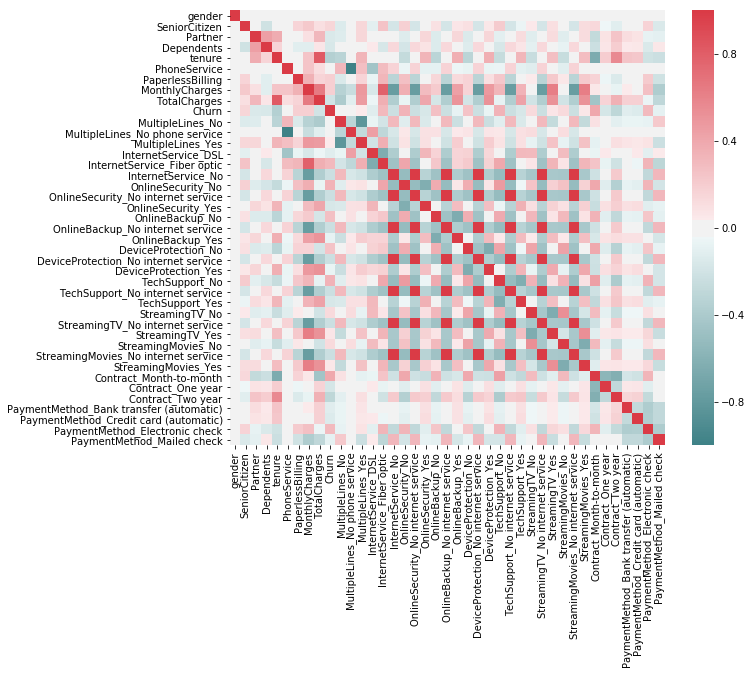

In [21]:
import seaborn as sns

def plot_corr(df):

    fig, ax = plt.subplots(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200, 10, as_cmap=True),
            square=True, ax=ax)
plot_corr(df)

In [22]:
df.drop(['OnlineSecurity_No internet service', 
         'DeviceProtection_No internet service',
         'TechSupport_No internet service', 
         'StreamingTV_No internet service',
         'StreamingMovies_No internet service', 
         'OnlineSecurity_No internet service',
         'OnlineBackup_No internet service', 
         'MultipleLines_No phone service'],
          axis=1, inplace=True)

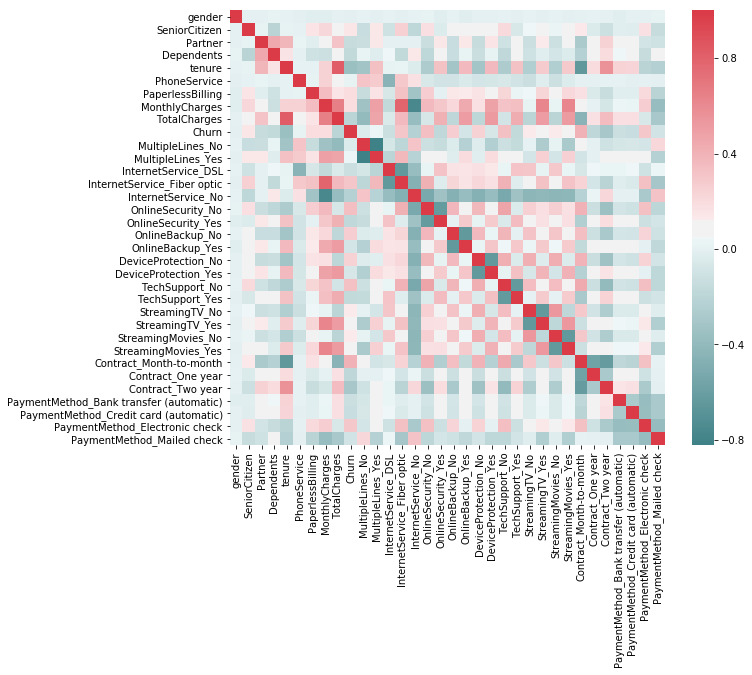

In [23]:
plot_corr(df)

In [24]:
df.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender                                    -0.008545
MultipleLines_No                          -0.032654
DeviceProtec

In [25]:
cat_cols = [col for col in df.columns if df.nunique()[col] < 5]
df.loc[df['Churn'] == 0, cat_cols].mean()

gender                                     0.507263
SeniorCitizen                              0.128995
Partner                                    0.527600
Dependents                                 0.343405
PhoneService                               0.901220
PaperlessBilling                           0.536122
Churn                                      0.000000
MultipleLines_No                           0.491187
MultipleLines_Yes                          0.410033
InternetService_DSL                        0.379043
InternetService_Fiber optic                0.348441
InternetService_No                         0.272516
OnlineSecurity_No                          0.394344
OnlineSecurity_Yes                         0.333140
OnlineBackup_No                            0.359094
OnlineBackup_Yes                           0.368390
DeviceProtection_No                        0.364710
DeviceProtection_Yes                       0.362774
TechSupport_No                             0.392408
TechSupport_

In [26]:
df.loc[df['Churn'] == 1, cat_cols].mean()

gender                                     0.497592
SeniorCitizen                              0.254682
Partner                                    0.357945
Dependents                                 0.174425
PhoneService                               0.909042
PaperlessBilling                           0.749064
Churn                                      1.000000
MultipleLines_No                           0.454254
MultipleLines_Yes                          0.454789
InternetService_DSL                        0.245586
InternetService_Fiber optic                0.693954
InternetService_No                         0.060460
OnlineSecurity_No                          0.781701
OnlineSecurity_Yes                         0.157838
OnlineBackup_No                            0.659711
OnlineBackup_Yes                           0.279829
DeviceProtection_No                        0.647940
DeviceProtection_Yes                       0.291600
TechSupport_No                             0.773676
TechSupport_

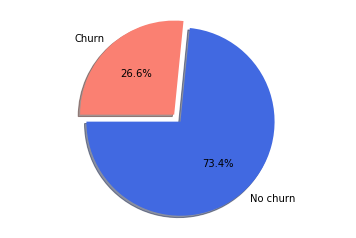

In [27]:
# Data to plot
labels = ['No churn', 'Churn']
sizes = df['Churn'].value_counts(True)
colors = ['royalblue', 'salmon']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Churn'], df[['Churn']], 
                                                    test_size=0.25, random_state=123)

In [32]:
import sys
!{sys.executable} -m pip install kmodes

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_org = X_train[['tenure', 'MonthlyCharges', 'TotalCharges']]
X_test_org = X_test[['tenure', 'MonthlyCharges', 'TotalCharges']]
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [34]:
from kmodes.kprototypes import KPrototypes

# Getting the best categorical variable
def cluster_cost(n, data, cat_cols):
    kproto = KPrototypes(n_clusters = n, init='Huang')
    kproto.fit(X_train, categorical=cat_cols)
    return kproto.cost_


cat_cols = [i for i in range(0,33) if X_train.iloc[:,i].nunique() < 5]
distortions = []
for i in range(1, 8):
    distortions.append(cluster_cost(i, X_train, cat_cols))

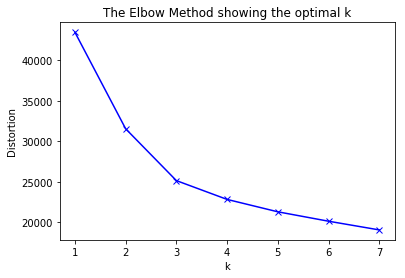

In [35]:
K = range(1, 8)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [36]:
from kmodes.kprototypes import KPrototypes
cat_cols = [i for i in range(0,33) if X_train.iloc[:,i].nunique() < 5]
kproto = KPrototypes(n_clusters=3)
cluster_train = kproto.fit_predict(X_train.values, categorical = cat_cols)
cluster_test = kproto.predict(X_test.values, categorical = cat_cols)

In [37]:
X_train['cluster'] = cluster_train
X_test['cluster'] = cluster_test

In [38]:
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = X_train_org
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = X_test_org

In [39]:
X_train = pd.get_dummies(data = X_train, columns=['cluster'])
X_test = pd.get_dummies(data = X_test, columns=['cluster'])

In [36]:
xs = []
ys = []
zs = []

"""
data = X_train[(y_train == 0)]
xs.append(data['tenure'])
ys.append(data['MonthlyCharges'])
zs.append(data['TotalCharges'])
"""
"""
data = X_train[(y_train == 1)]
xs.append(data['tenure'])
ys.append(data['MonthlyCharges'])
zs.append(data['TotalCharges'])
"""
"(y_train == 1) & "
for seg in ['cluster_0', 'cluster_1', 'cluster_2']:
    data = X_train[(X_train[seg] == 1)]
    xs.append(data['tenure'])
    ys.append(data['MonthlyCharges'])
    zs.append(data['TotalCharges'])


trace1 = go.Scatter3d(
    x=xs[0],
    y=ys[0],
    z=zs[0],
    mode='markers',
    marker = dict(size = 1, color= "blue"),
    name = 'Cluster 0'
)

trace2 = go.Scatter3d(
    x=xs[1],
    y=ys[1],
    z=zs[1],
    mode='markers',
    marker = dict(size = 1,color = "green"),
    name = 'Cluster 1'
)

trace3 = go.Scatter3d(
    x=xs[2],
    y=ys[2],
    z=zs[2],
    mode='markers',
    marker = dict(size = 1,color = "yellow"),
    name = 'Cluster 2'
)

data = X_train[(y_train == 1)]
xs.append(data['tenure'])
ys.append(data['MonthlyCharges'])
zs.append(data['TotalCharges'])

trace4 = go.Scatter3d(
    x=xs[3],
    y=ys[3],
    z=zs[3],
    mode='markers',
    marker = dict(size = 1,color = "red"),
    name = 'Churn'
)

data = [trace1, trace2, trace3, trace4]


layout = go.Layout(
    title = "Churn vs No Churn in three variables",
    scene = dict(
    xaxis = dict(
        title='Tenure'),
    yaxis = dict(
        title='Monthly Charges'),
    zaxis = dict(
        title='Total Charges'),),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='telco_viz')

In [60]:
print('churn-rate:', y_train[X_train['cluster_0'] == 1].mean())
X_train[X_train['cluster_0'] == 1].mean()

churn-rate: Churn    0.071167
dtype: float64


gender                                       0.539985
SeniorCitizen                                0.045488
Partner                                      0.512106
Dependents                                   0.429934
tenure                                      32.184153
PhoneService                                 0.867205
PaperlessBilling                             0.291269
MonthlyCharges                              25.588078
TotalCharges                               868.696148
MultipleLines_No                             0.677183
MultipleLines_Yes                            0.190022
InternetService_DSL                          0.181952
InternetService_Fiber optic                  0.000000
InternetService_No                           0.818048
OnlineSecurity_No                            0.074835
OnlineSecurity_Yes                           0.107117
OnlineBackup_No                              0.097579
OnlineBackup_Yes                             0.084373
DeviceProtection_No         

In [61]:
print('churn-rate:', y_train[X_train['cluster_1'] == 1].mean())
X_train[X_train['cluster_1'] == 1].mean()

churn-rate: Churn    0.143791
dtype: float64


gender                                        0.511586
SeniorCitizen                                 0.201426
Partner                                       0.689840
Dependents                                    0.349376
tenure                                       57.131907
PhoneService                                  0.932858
PaperlessBilling                              0.686869
MonthlyCharges                               90.360012
TotalCharges                               5149.492721
MultipleLines_No                              0.220440
MultipleLines_Yes                             0.712418
InternetService_DSL                           0.376114
InternetService_Fiber optic                   0.623886
InternetService_No                            0.000000
OnlineSecurity_No                             0.438503
OnlineSecurity_Yes                            0.561497
OnlineBackup_No                               0.326797
OnlineBackup_Yes                              0.673203
DeviceProt

In [62]:
print('churn-rate:', y_train[X_train['cluster_2'] == 1].mean())
X_train[X_train['cluster_2'] == 1].mean()

churn-rate: Churn    0.451526
dtype: float64


gender                                        0.474865
SeniorCitizen                                 0.194794
Partner                                       0.307002
Dependents                                    0.186266
tenure                                       14.114452
PhoneService                                  0.898115
PaperlessBilling                              0.697038
MonthlyCharges                               69.661849
TotalCharges                               1011.693627
MultipleLines_No                              0.548474
MultipleLines_Yes                             0.349641
InternetService_DSL                           0.437163
InternetService_Fiber optic                   0.562837
InternetService_No                            0.000000
OnlineSecurity_No                             0.802065
OnlineSecurity_Yes                            0.197935
OnlineBackup_No                               0.747307
OnlineBackup_Yes                              0.252693
DeviceProt

In [63]:
!pip install imbalanced-learn

In [65]:
# Had to reset kernel since kmodes is using older version scikit learn.
# Saving the variables
#X_train.to_csv("X_train.csv")
#X_test.to_csv("X_test.csv")
#y_train.to_csv("y_train.csv")
#y_test.to_csv("y_test.csv")

In [2]:
X_train = pd.read_csv("X_train.csv", index_col="Unnamed: 0")
X_test = pd.read_csv("X_test.csv", index_col="Unnamed: 0")
y_train = pd.read_csv("y_train.csv", index_col="Unnamed: 0")
y_test = pd.read_csv("y_test.csv", index_col="Unnamed: 0")
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,cluster_0,cluster_1,cluster_2
1980,1,0,0,0,10,1,1,95.25,1021.55,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1
5485,1,0,0,0,1,1,1,50.75,50.75,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
198,1,0,1,1,72,1,1,112.25,8041.65,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0
6326,0,0,0,0,62,0,1,43.60,2748.70,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
1304,1,1,1,0,15,1,1,85.60,1345.55,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1


In [3]:
y_train = y_train['Churn']
y_test = y_test['Churn']

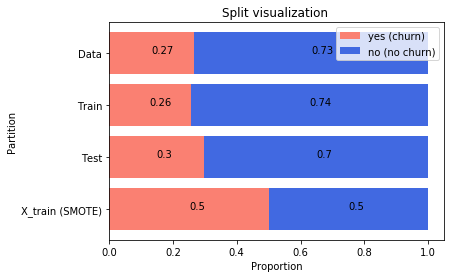

In [4]:
from imblearn.over_sampling import SMOTE
X_y_smotes = [] # Collect the smoted version of variables

smote = SMOTE(ratio='minority', random_state = 1234)
X_sm, y_sm = smote.fit_sample(X_train, y_train) #ONLY APPLIED TO TRAINING!!!
X_y_smotes.append([X_sm, y_sm])

train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = (y_train.value_counts() + y_test.value_counts()) / (len(y_train) + len(y_test))
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], color='salmon', label='yes (churn)')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], left=[smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], color='royalblue', label='no (no churn)')

ax.set_title('Split visualization ')
ax.legend(loc='upper right')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

In [5]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = clf, X = X_test, y = y_test, cv = 5)
    preds = clf.predict(X_test)
    print("accuracy", clf.score(X_test, y_test))
    print("mean of accuracy", np.mean(accuracies))
    print(classification_report(y_test, preds))
    return preds
    
    

In [6]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression(random_state=42)
logistic_pred = classifier(logistic_clf, X_train, y_train, X_test, y_test)

accuracy 0.806029579067
mean of accuracy 0.79975974026
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1234
           1       0.74      0.54      0.62       524

   micro avg       0.81      0.81      0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



In [7]:
logistic_clf_sm = LogisticRegression(random_state=42)
logistic_pred_sm = classifier(logistic_clf_sm, X_sm, y_sm, X_test, y_test)

accuracy 0.761092150171
mean of accuracy 0.79975974026
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1234
           1       0.57      0.79      0.66       524

   micro avg       0.76      0.76      0.76      1758
   macro avg       0.73      0.77      0.74      1758
weighted avg       0.80      0.76      0.77      1758



In [8]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
tree_pred = classifier(tree_clf, X_train, y_train, X_test, y_test)

accuracy 0.779863481229
mean of accuracy 0.762775974026
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1234
           1       0.72      0.42      0.53       524

   micro avg       0.78      0.78      0.78      1758
   macro avg       0.76      0.68      0.69      1758
weighted avg       0.77      0.78      0.76      1758



In [9]:
tree_clf_sm = DecisionTreeClassifier(random_state=42, max_depth = 3)
tree_pred_sm = classifier(tree_clf_sm, X_sm, y_sm, X_test, y_test)

accuracy 0.752559726962
mean of accuracy 0.762775974026
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1234
           1       0.56      0.77      0.65       524

   micro avg       0.75      0.75      0.75      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.79      0.75      0.76      1758



In [10]:
from sklearn.svm import SVC
clf_svc = SVC()
svc_pred = classifier(clf_svc, X_train, y_train, X_test, y_test)

accuracy 0.748577929465
mean of accuracy 0.734324675325
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1234
           1       0.69      0.29      0.40       524

   micro avg       0.75      0.75      0.75      1758
   macro avg       0.72      0.62      0.62      1758
weighted avg       0.74      0.75      0.71      1758



In [11]:
clf_svc_sm = SVC()
svc_pred_sm = classifier(clf_svc_sm, X_sm, y_sm, X_test, y_test)

accuracy 0.729237770193
mean of accuracy 0.734324675325
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1234
           1       0.55      0.50      0.53       524

   micro avg       0.73      0.73      0.73      1758
   macro avg       0.67      0.66      0.67      1758
weighted avg       0.72      0.73      0.73      1758



In [12]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

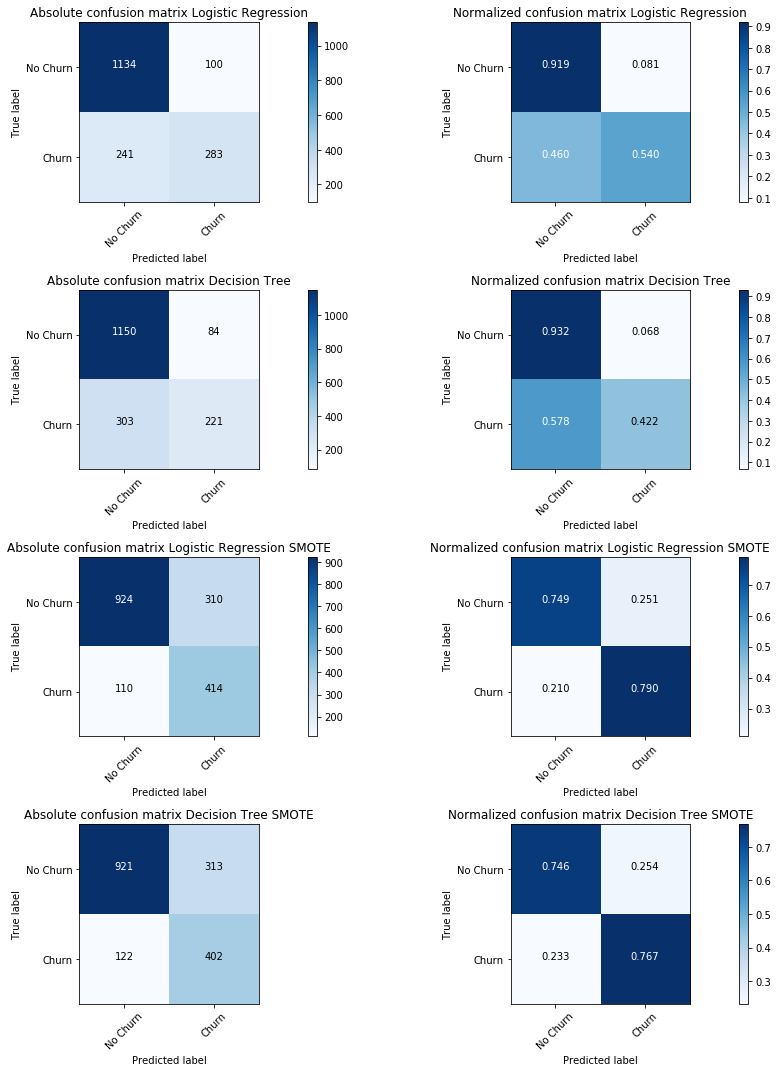

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
plt.figure(figsize = (20, 15))
class_names = ['No Churn', 'Churn']

for original, predictions, subplot, subplot_n, algo in [(y_test, logistic_pred, 1, 2, "Logistic Regression"),
                                                        (y_test, tree_pred, 3, 4, "Decision Tree"),
                                                        (y_test, logistic_pred_sm, 5, 6, "Logistic Regression SMOTE"),
                                                        (y_test, tree_pred_sm, 7, 8, "Decision Tree SMOTE")]:
    cnf_matrix = confusion_matrix(original, predictions) 
    plt.subplot(4, 2, subplot)
    plot_confusion_matrix(cnf_matrix, classes = class_names, title = ("Absolute confusion matrix " + algo))
    plt.subplot(4, 2, subplot_n)
    plot_confusion_matrix(cnf_matrix, classes = class_names, normalize = True, title = ("Normalized confusion matrix " + algo))

plt.tight_layout()
plt.show()

In [14]:
cluster_wise = X_test[['cluster_0', 'cluster_1', 'cluster_2']]
cluster_wise['predictions'] = logistic_pred_sm
cluster_wise['true_label'] = y_test

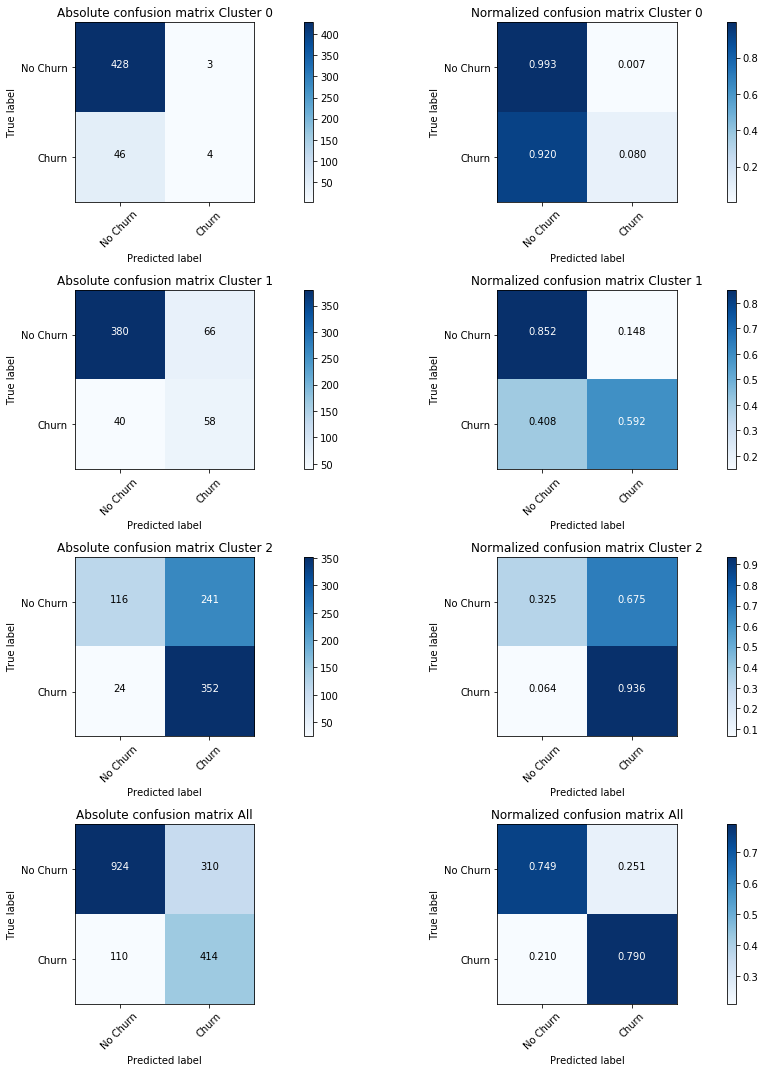

In [15]:
from sklearn.metrics import confusion_matrix
import itertools
plt.figure(figsize = (20, 15))

for cluster, subplot, subplot_n, clust in [('cluster_0', 1, 2, "Cluster 0"),
                                          ('cluster_1', 3, 4, "Cluster 1"),
                                          ('cluster_2', 5, 6, "Cluster 2"),
                                          ('everything', 7, 8, "All")]:
    if cluster == 'everything':
        cnf_matrix = confusion_matrix(cluster_wise['true_label'], cluster_wise['predictions'])
    else:
        idx = cluster_wise[cluster] == 1
        cnf_matrix = confusion_matrix(cluster_wise.loc[idx, 'true_label'], cluster_wise.loc[idx, 'predictions'])
        
    plt.subplot(4, 2, subplot)
    plot_confusion_matrix(cnf_matrix, classes = class_names, title = ("Absolute confusion matrix " + clust))
    plt.subplot(4, 2, subplot_n)
    plot_confusion_matrix(cnf_matrix, classes = class_names, normalize = True, title = ("Normalized confusion matrix " + clust))

plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
def score_clusterwise(y_preds, y_true):
    print("accuracy", accuracy_score(y_true, y_preds))
    print(classification_report(y_true, y_preds))

In [17]:
for cluster in ['cluster_0', 'cluster_1', 'cluster_2']:
    idx = cluster_wise[cluster] == 1
    print(cluster)
    score_clusterwise(cluster_wise.loc[idx, 'predictions'], cluster_wise.loc[idx, 'true_label'])

cluster_0
accuracy 0.898128898129
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       431
           1       0.57      0.08      0.14        50

   micro avg       0.90      0.90      0.90       481
   macro avg       0.74      0.54      0.54       481
weighted avg       0.87      0.90      0.86       481

cluster_1
accuracy 0.805147058824
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       446
           1       0.47      0.59      0.52        98

   micro avg       0.81      0.81      0.81       544
   macro avg       0.69      0.72      0.70       544
weighted avg       0.83      0.81      0.81       544

cluster_2
accuracy 0.638472032742
              precision    recall  f1-score   support

           0       0.83      0.32      0.47       357
           1       0.59      0.94      0.73       376

   micro avg       0.64      0.64      0.64       733
   macro avg       0.71   

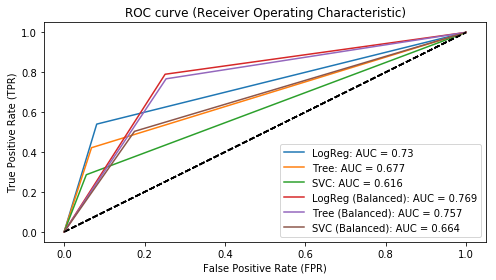

In [29]:
from sklearn.metrics import auc, roc_curve

plt.figure(figsize = (7, 4))
for test, pred, num, name in zip([y_test, y_test, y_test, y_test, y_test, y_test], 
                                 [logistic_pred, tree_pred, svc_pred, logistic_pred_sm, tree_pred_sm,
                                  svc_pred_sm], range(1,7), 
                                 ['LogReg', 'Tree', 'SVC', 'LogReg (Balanced)', 'Tree (Balanced)',
                                  'SVC (Balanced)']):
    fpr, tpr, thresholds = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.tight_layout()
plt.show()